---
# <center><font color = 'purple'> KORELASI DAN REGRESI - Lanjutan
---

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
import warnings
warnings.filterwarnings("ignore")

### <font color = 'blue'> Load Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

---
# <font color = 'brown'>1. Analisis Korelasi

In [3]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


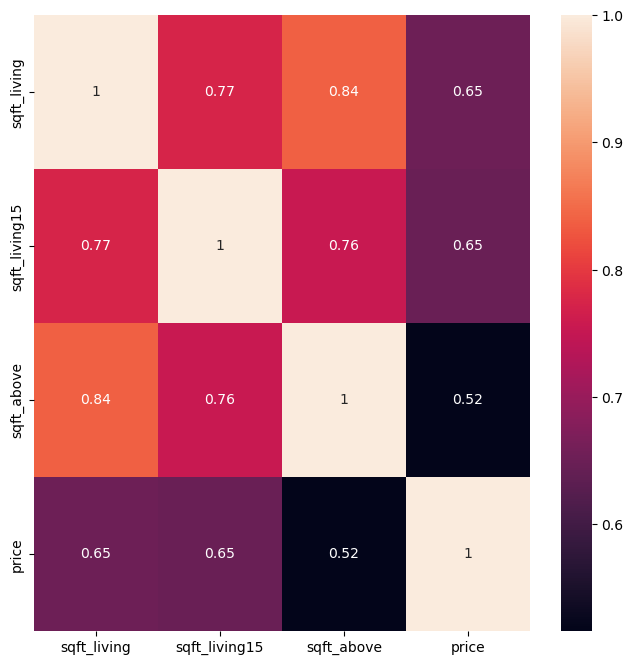

In [4]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

## <font color = 'orange'> Split Dataset 

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

In [5]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
print("Ukuran training dan testing data: ")
print("Training dataset: ", X_train.shape, y_train.shape)
print("Testing dataset: ", X_test.shape, y_test.shape)

Ukuran training dan testing data: 
Training dataset:  (80, 3) (80,)
Testing dataset:  (20, 3) (20,)


In [8]:
data.shape

(100, 4)

---
# <font color = 'brown'>2. Modelling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


In [9]:
# Training model Regresi Linear
LinearReg = LinearRegression().fit(X_train, y_train)

# Training model Regresi Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Training model Regresi Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Training model SVR
SVReg = SVR().fit(X_train, y_train)

# Training model DTR
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

---
# <font color = 'brown'>3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

In [11]:
# Hasil prediksi model regresi linear
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model regresi lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model regresi ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# Hasil prediksi model DTR
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

In [12]:
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  51040616225.03679
Nilai MSE data testing Regresi Linier =  32881775262.158394 

Nilai MSE data training Regresi Lasso =  51040616225.0368
Nilai MSE data testing Regresi Lasso =  32881775271.07428 

Nilai MSE data training Regresi Ridge =  51040616225.03679
Nilai MSE data testing Regresi Ridge =  32881775254.902416 

Nilai MSE data training Regresi SVR =  113673471256.08711
Nilai MSE data testing Regresi SVR =  37393496977.231895 

Nilai MSE data training Regresi DTR =  455625000.0
Nilai MSE data testing Regresi DTR =  40958648000.0 



Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

In [13]:
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {SVReg.score(X, Y)}')
print(f'R^2 score Regresi DTR: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.48353037146199596
R^2 score Regresi Lasso: 0.48353037144257016
R^2 score Regresi Ridge: 0.4835303714778054
R^2 score Regresi SVR: -0.07215508470730314
R^2 score Regresi DTR: 0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## <font color = 'orange'> Visualisasi Hasil Prediksi dengan Data Sebelumnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

### <font color = 'blue'> Linear Regression

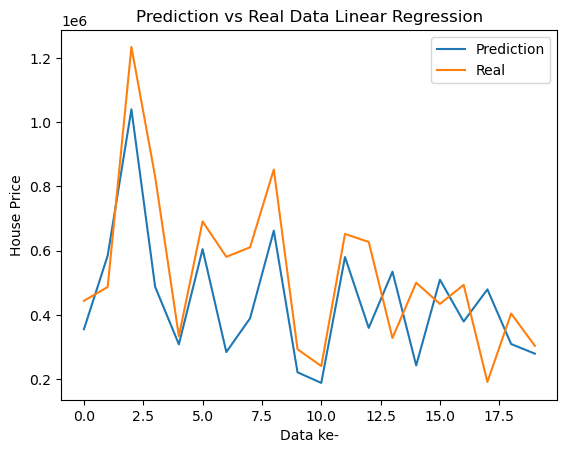

In [14]:
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Linear Regression')
plt.xlabel('Data ke-')
plt.ylabel('House Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

### <font color = 'blue'> Lasso Regression

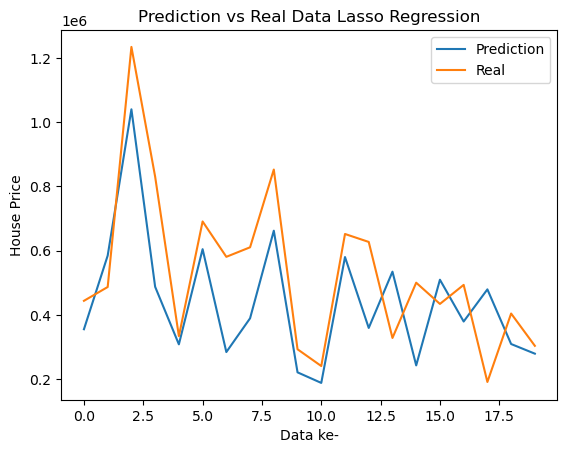

In [15]:
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Lasso Regression')
plt.xlabel('Data ke-')
plt.ylabel('House Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

### <font color = 'blue'> Ridge Regression

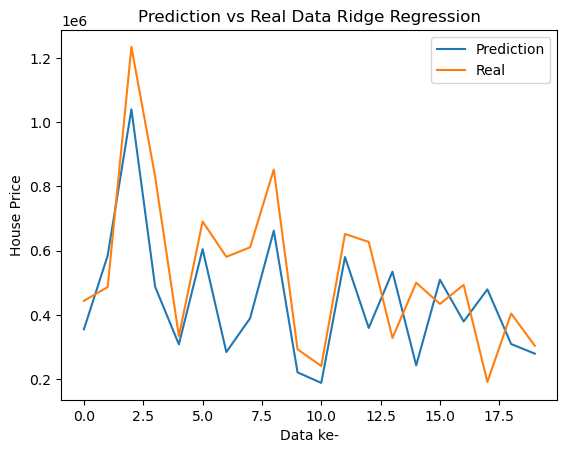

In [16]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Ridge Regression')
plt.xlabel('Data ke-')
plt.ylabel('House Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

### <font color = 'blue'>SVR

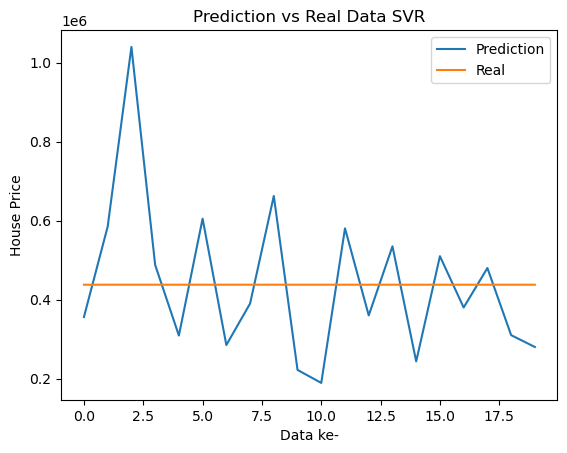

In [17]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel('Data ke-')
plt.ylabel('House Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

### <font color = 'blue'>DTR

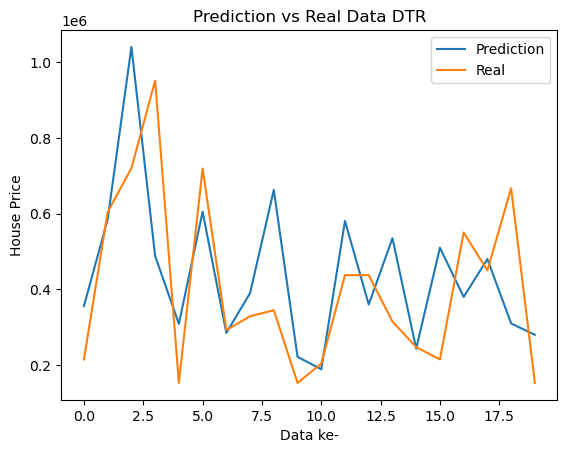

In [18]:
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel('Data ke-')
plt.ylabel('House Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

# <font color = 'brown'> 4. Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

In [20]:
sqft_living = float(input('Input SQFT Living='))
sqft_living15 = float(input('Input SQFT Living 15='))
sqft_above = float(input('Input SQFT Above='))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Housing Price', hasil_prediksi)

Input SQFT Living=10_000
Input SQFT Living 15=15_000
Input SQFT Above=9_000

Prediksi Housing Price 1225000.0


# <font color = 'brown'> Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [20]:
data = pd.read_csv('housing_price.csv')
data.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


### <font color = 'blue'>  Analisis Korelasi

In [21]:
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


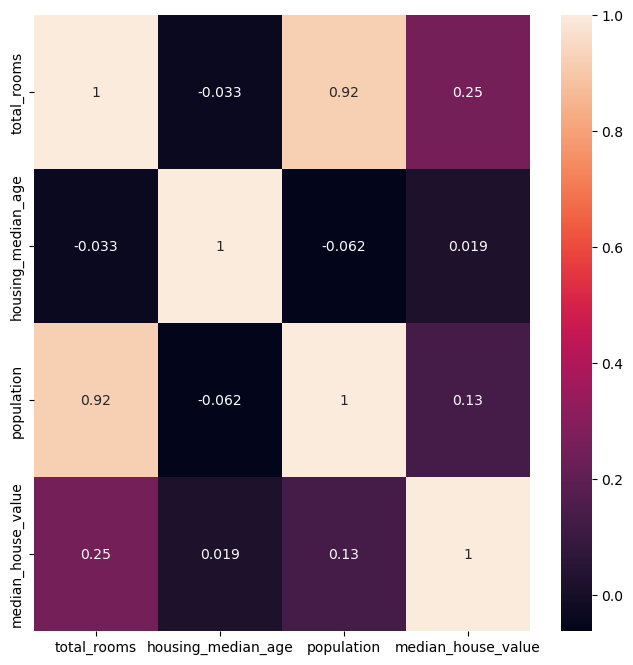

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

### <font color = 'blue'> Split Dataset

In [38]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
print("Ukuran training dan testing data: ")
print("Training dataset: ", X_train.shape, y_train.shape)
print("Testing dataset: ", X_test.shape, y_test.shape)

Ukuran training dan testing data: 
Training dataset:  (80, 3) (80,)
Testing dataset:  (20, 3) (20,)


### <font color = 'blue'>Modelling

In [40]:
# Training model Regresi Linear
LinearReg = LinearRegression().fit(X_train, y_train)

# Training model Regresi Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Training model Regresi Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Training model SVR
SVReg = SVR().fit(X_train, y_train)

# Training model DTR
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

### <font color = 'blue'> Evaluasi Model Menggunakan Metric MSE dan R2¶

In [41]:
# Hasil prediksi model regresi linear
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model regresi lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model regresi ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# Hasil prediksi model DTR
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [42]:
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  186305.990321744
Nilai MSE data testing Regresi Linier =  112988.71650698684 

Nilai MSE data training Regresi Lasso =  186305.99039434383
Nilai MSE data testing Regresi Lasso =  112986.71769802284 

Nilai MSE data training Regresi Ridge =  186305.990321744
Nilai MSE data testing Regresi Ridge =  112988.71634736806 

Nilai MSE data training Regresi SVR =  1571757.3652947198
Nilai MSE data testing Regresi SVR =  762815.6134850367 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  468580.05 



In [43]:
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {SVReg.score(X, Y)}')
print(f'R^2 score Regresi DTR: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.8648440179311381
R^2 score Regresi Lasso: 0.864844332668669
R^2 score Regresi Ridge: 0.8648440179562757
R^2 score Regresi SVR: -0.11024779655874917
R^2 score Regresi DTR: 0.9262054750829132


### <font color = 'blue'> Visualisasi Hasil Prediksi dengan Data Sebelumnya

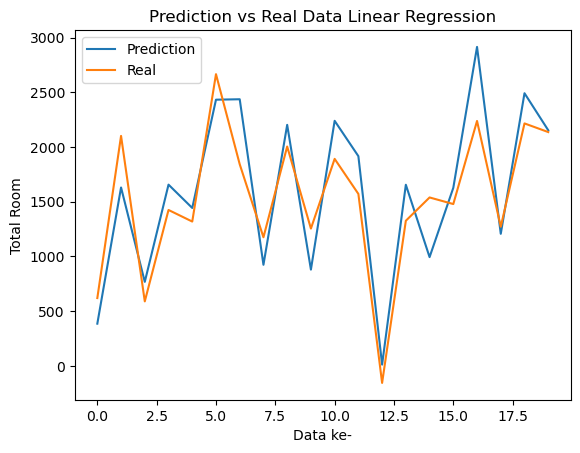

In [44]:
# Linear Regression
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Linear Regression')
plt.xlabel('Data ke-')
plt.ylabel('Total Room')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

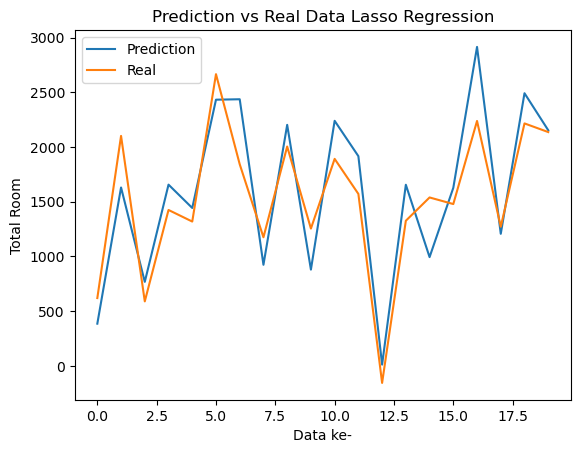

In [45]:
# Lasso Regression
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Lasso Regression')
plt.xlabel('Data ke-')
plt.ylabel('Total Room')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

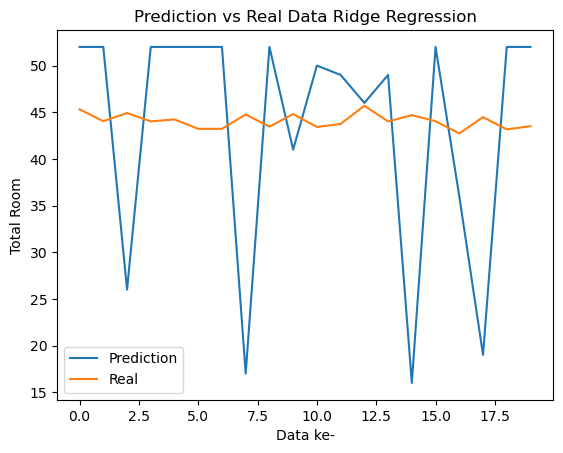

In [34]:
# Ridge Regression
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Ridge Regression')
plt.xlabel('Data ke-')
plt.ylabel('Total Room')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

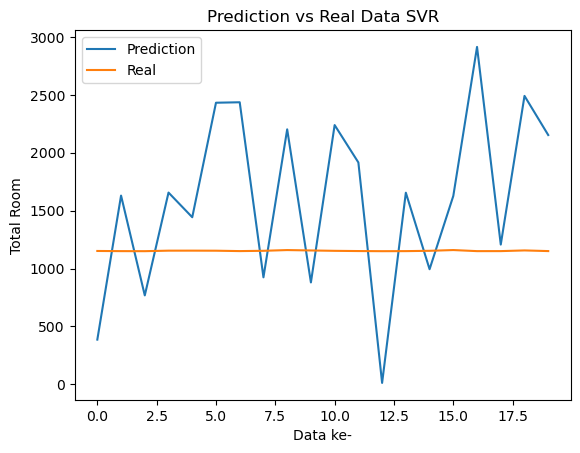

In [46]:
# SVR
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel('Data ke-')
plt.ylabel('Total Room')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

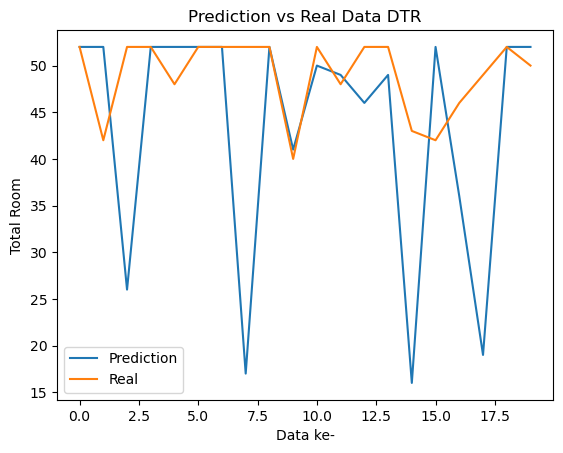

In [36]:
# DTR
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel('Data ke-')
plt.ylabel('Total Room')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

### <font color = 'blue'> Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

In [49]:
housing_median_age = float(input('Input housing median age='))
population = float(input('Input population='))
median_house_value = float(input('Input median house value='))
data_baru = [[housing_median_age, population, median_house_value]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Housing Price', hasil_prediksi)

Input housing median age=70000
Input population=50000
Input median house value=70000

Prediksi Housing Price 5329.0
